In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Importieren data
df = pd.read_csv("data/dat.csv", sep=',', index_col=False)
print(df)

   Unnamed: 0   x1   x2
0           1  1.1  6.5
1           2  2.1  6.5
2           3  2.1  5.5
3           4  1.1  4.5
4           5  2.1  3.5
5           6 -0.9 -2.5
6           7 -1.9 -4.5
7           8 -0.9 -5.5
8           9 -2.9 -6.5
9          10 -1.9 -7.5


In [4]:
# Daten ansehen
X = df.iloc[:,1:]
print(X)

    x1   x2
0  1.1  6.5
1  2.1  6.5
2  2.1  5.5
3  1.1  4.5
4  2.1  3.5
5 -0.9 -2.5
6 -1.9 -4.5
7 -0.9 -5.5
8 -2.9 -6.5
9 -1.9 -7.5


<AxesSubplot: xlabel='x1', ylabel='x2'>

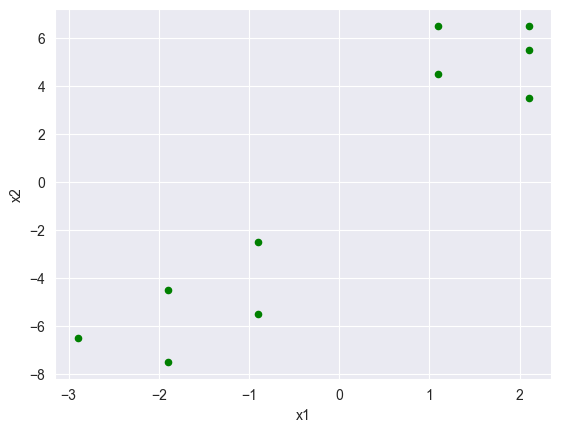

In [5]:
X.plot.scatter(x='x1', y='x2', c='g')

In [6]:
# daten normalizieren
X = (X - X.mean())
X

,x1,x2
0,1.1,6.5
1,2.1,6.5
2,2.1,5.5
3,1.1,4.5
4,2.1,3.5
5,-0.9,-2.5
6,-1.9,-4.5
7,-0.9,-5.5
8,-2.9,-6.5
9,-1.9,-7.5


<AxesSubplot: xlabel='x1', ylabel='x2'>

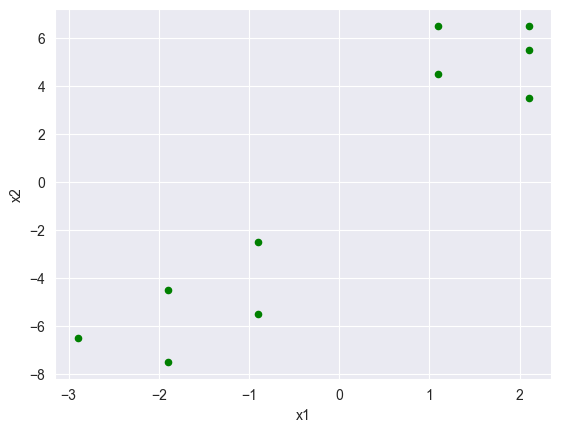

In [7]:
X.plot.scatter(x='x1', y='x2', c='g')

In [8]:
#Rechnen kovarianzmatrix C
X_corr = (1 / 10)* X.T.dot(X)
X_corr

,x1,x2
x1,3.29,9.35
x2,9.35,30.25


Text(0.5, 1.0, 'Correlation matrix')

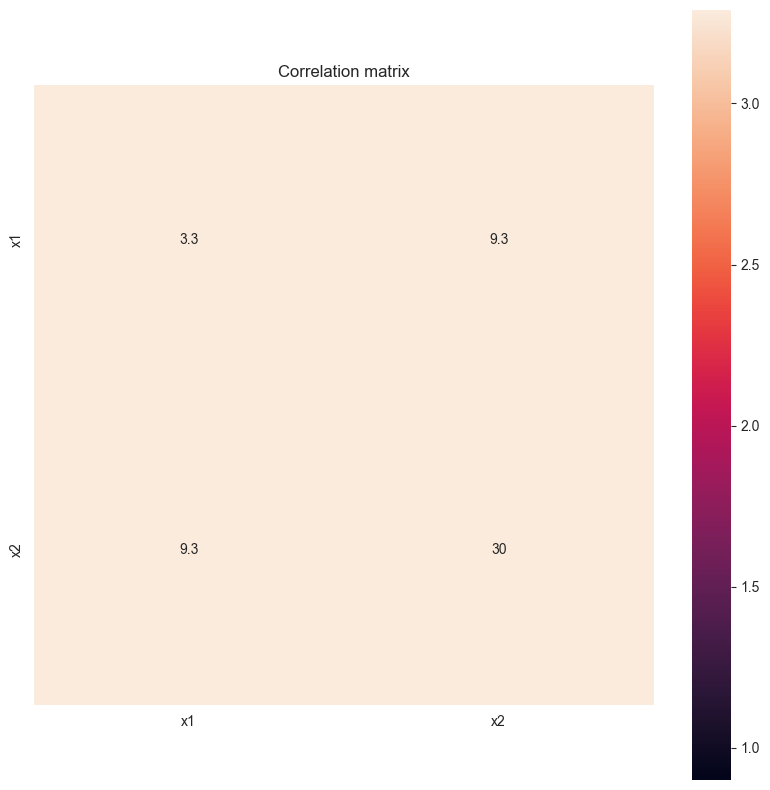

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True, annot=True)
plt.title('Correlation matrix')

In [10]:
# berechen eigenvektoren und eigenwerten
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
# eigenwerte  und  loadings
loadings_matrix = pd.DataFrame(eig_vectors, columns=['PC1', 'PC2'], index=X.columns)
eig_values, loadings_matrix

(array([33.17527049,  0.36472951]),
          PC1       PC2
 x1 -0.298591 -0.954381
 x2 -0.954381  0.298591)

In [11]:
np.sum(eig_values) == 2

False

Text(0.5, 0, 'Dimensions')

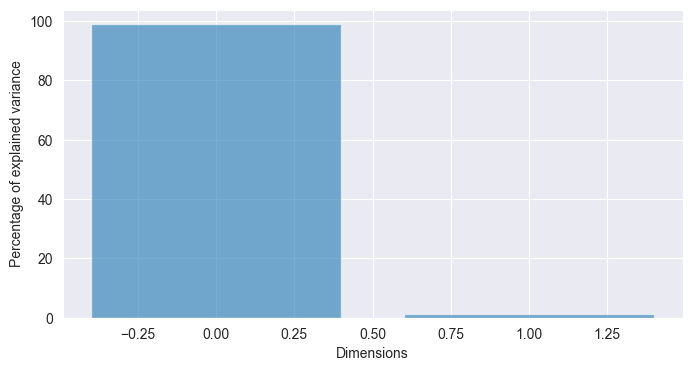

In [12]:
# plot Varianzaufklärung
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(2), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')


In [13]:
# oder eigenvalue für PC1 ist bigger than eigenvalue für PC2 -> bessere Varianzaufklärung

In [14]:
# brechnen scores
pc1 = X.dot(eig_vectors[:,0])
# pc1 = (-0,7071..) * x1 + (- 0,7071..) * x2
pc2 = X.dot(eig_vectors[:,1])
scores_df = pd.DataFrame({'PC1': pc1,
                            'PC2' : pc2})
scores_df


,PC1,PC2
0,-6.531928,0.891020
1,-6.830519,-0.063361
2,-5.876137,-0.361952
3,-4.623165,0.293839
4,-3.967375,-0.959133
5,2.654685,0.112466
6,4.862038,0.469666
7,5.517829,-0.783306
8,7.069391,0.826866
9,7.725182,-0.426106


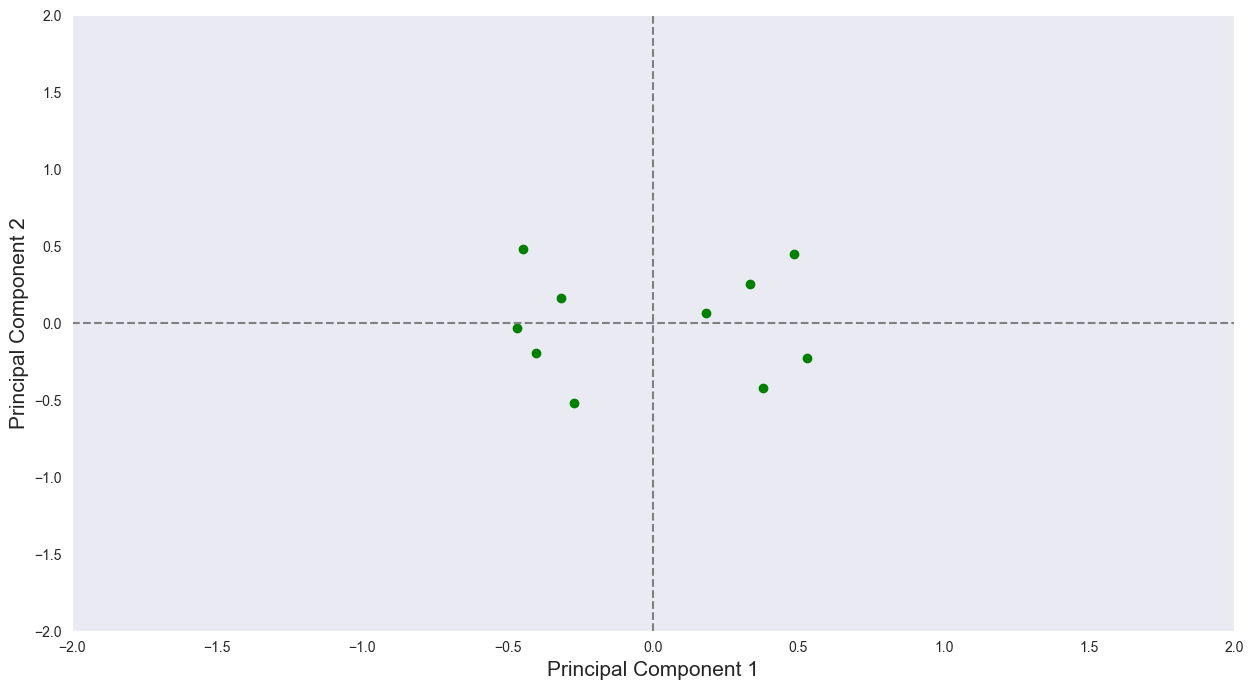

In [21]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize = (15, 8))
    xs = scores_df.iloc[:,0]
    ys = scores_df.iloc[:,1]
    n=scores_df.shape[1]
    # scaling x and y
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(pc1*scalex, pc2*scaley, c = 'g')
    plt.scatter(pc1, pc2, c = 'g')

    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.grid()
    plt.show()
plot_scatter(pc1, pc2)

In [1]:
# a = np.array([[1, 2], [2, 3]])
# b = np.array([3, 4])
# c = a.T * b
# c

In [2]:
# # pca loadings = correlation between old variables and principle components (eigenverktors)
# pcloading = eig_vectors.T*np.sqrt(eig_values)
# loading_matrix = pd.DataFrame(pcloading, columns=['PC1', 'PC2'], index=X.columns)
# loading_matrix

In [3]:
# loading_matrix.plot.scatter(x='PC1', y='PC2', c='g')

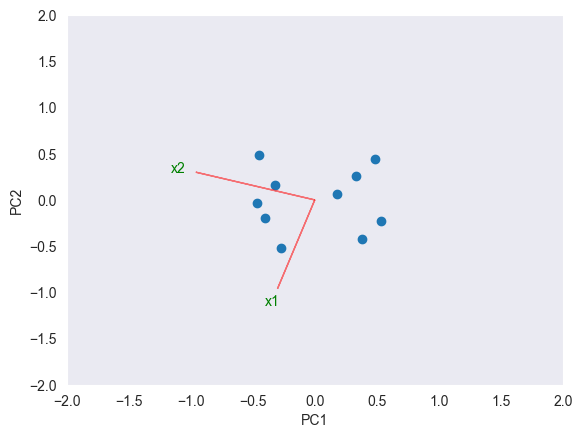

In [20]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1 = pcax - 1
    pca2 = pcay - 1
    xs = score.iloc[:,pca1]
    ys = score.iloc[:,pca2]
    n=score.shape[1]
    # scaling x and y
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())

    plt.scatter(xs*scalex,ys*scaley)
    plt.scatter(xs,ys)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "x"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

biplot(scores_df,eig_vectors,1,2,labels=None)
